#### tf.keras.callbacks.ModelCheckpoint* tf.keras.callbacks.ModelCheckpoint(
    filepath,
    monitor: str = 'val_loss',
    verbose: int = 0,
    save_best_only: bool = False,
    save_weights_only: bool = False,
    mode: str = 'auto',
    save_freq='epoch',
    options=None,
    initial_value_threshold=None,
    **kwargs
)



#### tf.keras.callbacks.EarlyStopping
* tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=0,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf

np.random.seed(3)
tf.random.set_seed(3)
df_pre = pd.read_csv('./datasets/wine.csv', header= None)
df = df_pre.sample(frac=0.15)
df.head() 

,0,1,2,3,4,5,6,7,8,9,10,11,12
6245,5.9,0.180,0.28,1.0,0.037,24.0,88.0,0.99094,3.29,0.55,10.65,7,0
486,10.2,0.670,0.39,1.9,0.054,6.0,17.0,0.99760,3.17,0.47,10.00,5,1
273,8.4,0.715,0.20,2.4,0.076,10.0,38.0,0.99735,3.31,0.64,9.40,5,1
1993,6.8,0.370,0.51,11.8,0.044,62.0,163.0,0.99760,3.19,0.44,8.80,5,0
885,8.9,0.750,0.14,2.5,0.086,9.0,30.0,0.99824,3.34,0.64,10.50,5,1


In [3]:
dataset = df.values
X = dataset[:,0:12]
Y = dataset[:,12]

In [ ]:
model = Sequential()
model.add(Dense(30, input_dim=12, activation = 'relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(18, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer= 'adam', metrics = ['accuracy'])

MODEL_DIR = './ckeckponits_model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath = './ckeckponits_model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor= 'val_loss', save_best_only=True)

history = model.fit(X,Y, validation_split=0.33, epochs = 3500, batch_size=500)
history

Epoch 1/3500
2/2 [==============================] - 1s 251ms/step - loss: 2.5014 - accuracy: 0.2649 - val_loss: 2.0641 - val_accuracy: 0.2360
Epoch 2/3500
2/2 [==============================] - 0s 65ms/step - loss: 1.9009 - accuracy: 0.2619 - val_loss: 1.5414 - val_accuracy: 0.2267
Epoch 3/3500
2/2 [==============================] - 0s 111ms/step - loss: 1.4407 - accuracy: 0.2573 - val_loss: 1.1723 - val_accuracy: 0.2205
Epoch 4/3500
2/2 [==============================] - 0s 95ms/step - loss: 1.1085 - accuracy: 0.2358 - val_loss: 0.9363 - val_accuracy: 0.2112
Epoch 5/3500
2/2 [==============================] - 0s 88ms/step - loss: 0.9065 - accuracy: 0.2190 - val_loss: 0.7957 - val_accuracy: 0.3882
Epoch 6/3500
2/2 [==============================] - 0s 87ms/step - loss: 0.7881 - accuracy: 0.3629 - val_loss: 0.7002 - val_accuracy: 0.5311
Epoch 7/3500
2/2 [==============================] - 0s 80ms/step - loss: 0.7037 - accuracy: 0.5345 - val_loss: 0.6251 - val_accuracy: 0.7081
Epoch 8/350

In [4]:
y_loss = history.history['loss']
y_acc  = history.history['val_loss']


x_len = np.arange(len(y_acc))

plt.plot(x_len , y_loss, 'o' , c='red', markersize=3)
plt.plot(x_len , y_acc, 'o' , c='blue', markersize=3)
plt.show()

NameError: name 'history' is not defined

In [5]:
model = Sequential()
model.add(Dense(30, input_dim=12, activation = 'relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(18, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer= 'adam', metrics = ['accuracy'])

MODEL_DIR = './ckeckponits_model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath = './ckeckponits_model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor= 'val_loss', save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss' , patience=100)

history = model.fit(X,Y, validation_split=0.33, epochs = 3500, batch_size=500 , callbacks=[checkpointer , early_stopping_callback])
history



Epoch 1/3500


2/2 [==============================] - 2s 420ms/step - loss: 4.4516 - accuracy: 0.2634 - val_loss: 3.6273 - val_accuracy: 0.2391
Epoch 2/3500
1/2 [==============>...............] - ETA: 0s - loss: 3.5630 - accuracy: 0.2600

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 169ms/step - loss: 3.5126 - accuracy: 0.2435 - val_loss: 2.6838 - val_accuracy: 0.2236
Epoch 3/3500
2/2 [==============================] - 0s 93ms/step - loss: 2.6172 - accuracy: 0.2175 - val_loss: 1.7902 - val_accuracy: 0.2143
Epoch 4/3500
2/2 [==============================] - 0s 119ms/step - loss: 1.7627 - accuracy: 0.1868 - val_loss: 1.1025 - val_accuracy: 0.2857
Epoch 5/3500
2/2 [==============================] - 0s 88ms/step - loss: 1.1106 - accuracy: 0.2818 - val_loss: 0.6946 - val_accuracy: 0.5652
Epoch 6/3500
2/2 [==============================] - 0s 95ms/step - loss: 0.7437 - accuracy: 0.5452 - val_loss: 0.5147 - val_accuracy: 0.7360
Epoch 7/3500
2/2 [==============================] - 0s 80ms/step - loss: 0.5938 - accuracy: 0.7167 - val_loss: 0.4610 - val_accuracy: 0.7857
Epoch 8/3500
2/2 [==============================] - 0s 88ms/step - loss: 0.5598 - accuracy: 0.7596 - val_loss: 0.4560 - val_accuracy: 0.7888
Epoch 9/3500
2/2 [======

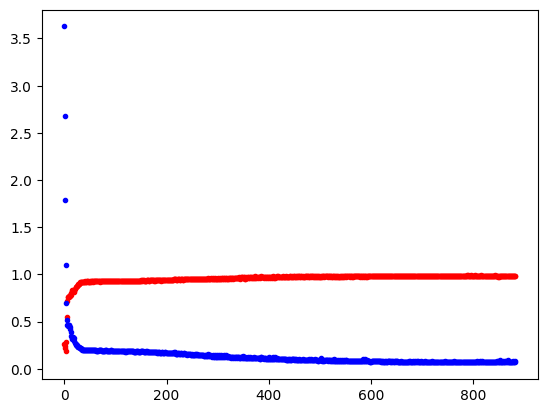

In [7]:
y_loss = history.history['accuracy']
y_acc  = history.history['val_loss']


x_len = np.arange(len(y_acc))

plt.plot(x_len , y_loss, 'o' , c='red', markersize=3)
plt.plot(x_len , y_acc, 'o' , c='blue', markersize=3)
plt.show()